In [1]:
import gym
import numpy as np
import random

In [2]:
Q={}
epsilion=0.3
alpha=0.3
gamma=0.9
actions=[0,1]

d:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


d:\Anaconda3\lib\site-packages\ipywidgets\widgets\widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
d:\Anaconda3\lib\site-packages\ipywidgets\widgets\widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


(0.0, 1.0, 0.0, 1.0)

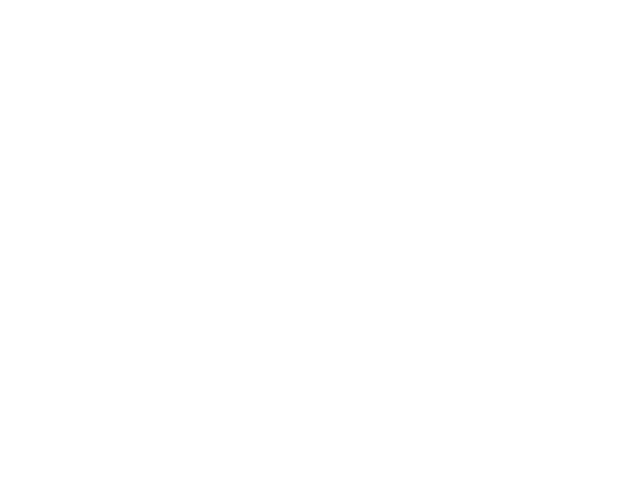

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.axis("off")

In [4]:
env=gym.make("CartPole-v1")

observation=env.reset()
img= ax.imshow(env.render(mode="rgb_array"))

for t in range(200):
    action =env.action_space.sample()
    observation,reward,done,info = env.step(action)
    img.set_data(env.render(mode="rgb_array"))
    
    ax.text(0.5,0.5,str(t),fontsize=20,backgroundcolor="white")
    fig.canvas.draw()
    if done:
        print(f"Episode finished after{t} timesteps")
        break
env.close()
    

d:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode finished after31 timesteps


In [5]:
def quantilize(observation):
    pos,vel,ang,ang_vel =observation
    pos=np.digitize(pos,bins=np.linspace(-2.4,2.4,num=10))
    vel = np.digitize(vel,bins=np.linspace(-3.5,3.5,num=10))
    ang = np.digitize(ang,bins=np.linspace(-0.5,0.5,num=10))
    ang_vel=np.digitize(ang_vel,bins=np.linspace(-3,3,num=10))
    return pos,vel,ang,ang_vel
    

d:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
def choose_action(state):
    q=np.array([Q.get((state,a),0) for a in actions],dtype=np.float32)

    if random.random()<epsilion:
        mag = np.abs(q).max()
        # add a random value to all the actions,recalculate maxQ
        q+=(np.random.rand(len(actions))-0.5)*mag

    if q.max()==q.min():
        i = np.random.choice(np.flatnonzero(q==q.max()))
    else:
        i = q.argmax()

    return actions[i]

    


In [7]:
def learn(state,action,reward,next_state):
    q_old = Q.get((state,action),None)
    if q_old is None:
        Q[(state,action)]=reward
    else:
         Q[(state,action)]=q_old+alpha*(reward+gamma*(max([Q.get((next_state,a),0) for a in actions]))-q_old)

d:\Anaconda3\lib\site-packages\ipywidgets\widgets\widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
d:\Anaconda3\lib\site-packages\ipywidgets\widgets\widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


(0.0, 1.0, 0.0, 1.0)

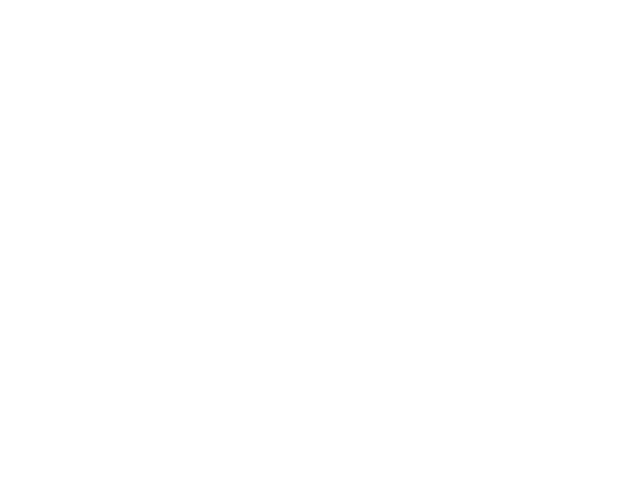

In [8]:
%matplotlib widget
import matplotlib.pyplot as plt

fig,ax2 = plt.subplots()
ax2.axis('off')

In [9]:
env=gym.make("CartPole-v1")
observation=env.reset()
img = ax2.imshow(env.render(mode="rgb_array"))



last_t=0
last_avg_t=0 

for episode in range(300):
    observation=env.reset()
    for t in range (200):
        state=quantilize(observation)
        action = choose_action(state)
        observation,reward,done,info = env.step(action)
        next_state = quantilize(observation)
        
        img.set_data(env.render(mode="rgb_array"))
        fig.canvas.draw()
        

        if not done:
            learn(state,action,reward,next_state)
        else:
            learn(state,action,-100,next_state)

            print(f"Episode {episode} finished after{t} timesteps")
            ax2.plot([episode,episode+1],[last_t,t],"blue")
            avg_t = last_avg_t*0.9+t*0.1
            ax2.plot([episode,episode+1],[last_avg_t,avg_t],"orange")
            fig.canvas.draw()
            last_t=t
            last_avg_t=avg_t
            break 
       
    
env.close()

Episode 0 finished after10 timesteps
Episode 1 finished after13 timesteps
Episode 2 finished after13 timesteps
Episode 3 finished after14 timesteps
Episode 4 finished after10 timesteps
Episode 5 finished after8 timesteps
Episode 6 finished after8 timesteps
Episode 7 finished after15 timesteps
Episode 8 finished after8 timesteps
Episode 9 finished after12 timesteps
Episode 10 finished after13 timesteps
Episode 11 finished after15 timesteps
Episode 12 finished after16 timesteps
Episode 13 finished after17 timesteps
Episode 14 finished after15 timesteps
Episode 15 finished after23 timesteps
Episode 16 finished after52 timesteps
Episode 17 finished after32 timesteps
Episode 18 finished after37 timesteps
Episode 19 finished after48 timesteps
Episode 20 finished after52 timesteps
Episode 21 finished after52 timesteps
Episode 22 finished after52 timesteps
Episode 23 finished after59 timesteps
Episode 24 finished after14 timesteps
Episode 25 finished after51 timesteps
Episode 26 finished after